# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset

In [2]:
dataset = pd.read_csv("dev.csv")
dataset.head()

,Description,Category
0,Buses approaching to this place is highly unsafe.,1
1,a man was commenting at me.,1
2,in a share auto,0
3,I was coming out of a club at night with a few...,1
4,One of my friends was molested in the crowd. T...,0


In [3]:
dataset.shape

(991, 2)

In [4]:
len(dataset)

991

In [5]:
dataset.columns

Index(['Description', 'Category'], dtype='object')

In [6]:
dataset.dtypes

Description    object
Category        int64
dtype: object

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

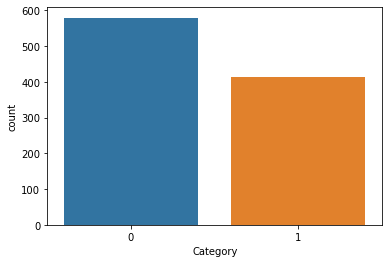

In [7]:
import seaborn as sns
sns.countplot('Category',data=dataset)

In [8]:
dataset.isnull().sum()

Description    0
Category       0
dtype: int64

# Cleaning the text

In [9]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
corpus = []
for i in range(0,991):   #we have 991 chats
    chat = re.sub('[^a-zA-Z]'," ",dataset["Description"][i]) #sub can replace anything in a text with anything #replace punctuation
    chat = chat.lower()
    chat = chat.split()
    pe = PorterStemmer()
    all_stopword = stopwords.words('english')
    type(all_stopword)
    all_stopword.remove('not')
    chat = [pe.stem(word) for word in chat if not word in set(all_stopword)]
                ## for every word in chats we check if the word not in stopword if yes then
                ## using porterstemmer we apply stemming if no then we drop the word
    chat = " ".join(chat)
    corpus.append(chat)

In [11]:
corpus

['buse approach place highli unsaf',
 'man comment',
 'share auto',
 'come club night friend guy came stop us ask quotkya rate hai quot shoo away kept follow us',
 'one friend molest crowd happen bridg thane railway station',
 'travel metro head colleg guy stand next tri come closer even gave indec look',
 'guy masturb roadsid ogl bu touch inapproprait',
 'travel red line metro guy continu stare give fli kiss weird facial express afternoon time',
 'late even around pm shop market south extn local delhi tri look auto go back home traffic peak could not get start walk toward flyover hope would get one point patch littl desert lot traffic mysteri lot pass vehicl start slow near ask direct vehicl realiz vehicl singl men drive big car well educ men big car see woman walk road alon could think two thing quotsh hookerquot alon therefor quotavailablequot felt sick vulner',
 'week morn found take dog walk milkman bike would follow time tri talk felt extrem uncomfort went home tear continu week 

# Creating a Bage of words model

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500) ##1500 columns
X = cv.fit_transform(corpus).toarray()
y = dataset["Category"]

In [13]:
len(X[0])  ## no. of col

1500

In [14]:
import pickle
pickle.dump(cv, open('cvx.pkl', 'wb'))

# Spliting the data

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape , y_test.shape

((792, 1500), (199,))

In [16]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
classifier = GaussianNB().fit(X_train, y_train)
cls = MultinomialNB().fit(X_train, y_train)

In [17]:
cls.score(X_test,y_test)

0.6834170854271356

In [18]:
classifier.score(X_test,y_test)

0.5326633165829145

In [19]:
y_pred = cls.predict(X_test)
type(y_test)

pandas.core.series.Series

In [20]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[85 46]
 [17 51]] 68.34170854271356


In [22]:
type(y_test)

pandas.core.series.Series

In [23]:
import pickle
# Save trained model to file
pickle.dump(cls, open("chatx.pkl", "wb"))

In [24]:
loaded_model = pickle.load(open("chatx.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.6834170854271356

In [25]:
import pickle

loaded_model = pickle.load(open("chatx.pkl", "rb"))
cv = pickle.load(open("cvx.pkl","rb"))

def new_chat(new_chat):
    new_chat = new_chat
    new_chat = re.sub('[^a-zA-Z]', ' ', new_chat)
    new_chat = new_chat.lower()
    new_chat = new_chat.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_chat = [ps.stem(word) for word in new_chat if not word in set(all_stopwords)]
    new_chat = ' '.join(new_chat)
    new_corpus = [new_chat]
    new_X_test = cv.transform(new_corpus).toarray()
    print(new_X_test.shape)
    new_y_pred = loaded_model.predict(new_X_test)
    return new_y_pred

new_chat = new_chat(str(input("Enter new chat...")))
if new_chat[0]==1:
    print("Sexual Predation")
else :
    print("Not Sexual Predation")

Enter new chat...fdsfas
(1, 1500)
Not Sexual Predation
